In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 200
warnings.simplefilter(action='ignore')

In [52]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [53]:
# Fucntion for summary
def column_summary_plus(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analyzes each column in a DataFrame and returns a summary of its properties.

    This improved version is faster, more accurate, and uses idiomatic pandas functions.

    Args:
        df (pd.DataFrame): The input DataFrame to analyze.

    Returns:
        pd.DataFrame: A DataFrame containing a summary for each column.
    """
    results_list = []  # Use a list to store results, much faster than appending to a DF

    # Loop through each column in the DataFrame
    for column in df.columns:
        # --- Basic Information ---
        col_dtype = df[column].dtype
        num_nulls = df[column].isnull().sum()
        num_non_nulls = df[column].notnull().sum()
        
        # --- Distinct Values Analysis ---
        value_counts = df[column].value_counts()
        num_distinct_values = len(value_counts)
        top_10_distinct = dict(value_counts.head(10))

        # --- Initialize stats as None ---
        min_value, max_value, median, average, average_non_zero = [None] * 5

        # --- Numeric Column Analysis ---
        if pd.api.types.is_numeric_dtype(df[column]):
            # Drop NA values for statistical calculations
            col_non_null = df[column].dropna()
            
            if not col_non_null.empty:
                min_value = col_non_null.min()
                max_value = col_non_null.max()
                median = col_non_null.median()
                average = col_non_null.mean()

                # Calculate average of non-zero values correctly
                non_zero_values = col_non_null[col_non_null != 0]
                if not non_zero_values.empty:
                    average_non_zero = non_zero_values.mean()
                else:
                    average_non_zero = 0 # Or None, depending on desired output

        # --- For non-numeric columns, min/max can still be calculated if they are sortable ---
        elif not num_distinct_values == 0:
             try:
                sorted_values = sorted(value_counts.index)
                min_value = sorted_values[0]
                max_value = sorted_values[-1]
             except TypeError:
                # This occurs if the column has mixed types that can't be sorted
                min_value = "Unsortable"
                max_value = "Unsortable"


        # Append all info for the column as a dictionary to our list
        results_list.append({
            'col_name': column,
            'col_dtype': col_dtype,
            'nulls_num': num_nulls,
            'non_nulls_num': num_non_nulls,
            'null_present': 1 if num_nulls > 0 else 0,
            'num_distinct_values': num_distinct_values,
            'min_value': min_value,
            'max_value': max_value,
            'median_no_na': median,
            'average_no_na': average,
            'average_non_zero': average_non_zero,
            'distinct_values_top_10': top_10_distinct
        })
        
    # Create the final DataFrame from the list of dictionaries in one go
    return pd.DataFrame(results_list)

In [54]:
# Check summary of data
summary_df = column_summary_plus(df)
display(summary_df)

,col_name,col_dtype,nulls_num,non_nulls_num,null_present,num_distinct_values,min_value,max_value,median_no_na,average_no_na,average_non_zero,distinct_values_top_10
0,customerID,object,0,7043,0,7043,0002-ORFBO,9995-HOTOH,NaN,NaN,NaN,"{'7590-VHVEG': 1, '3791-LGQCY': 1, '6008-NAIXK..."
1,gender,object,0,7043,0,2,Female,Male,NaN,NaN,NaN,"{'Male': 3555, 'Female': 3488}"
2,SeniorCitizen,int64,0,7043,0,2,0,1,0.00,0.162147,1.000000,"{0: 5901, 1: 1142}"
3,Partner,object,0,7043,0,2,No,Yes,NaN,NaN,NaN,"{'No': 3641, 'Yes': 3402}"
4,Dependents,object,0,7043,0,2,No,Yes,NaN,NaN,NaN,"{'No': 4933, 'Yes': 2110}"
5,tenure,int64,0,7043,0,73,0,72,29.00,32.371149,32.421786,"{1: 613, 72: 362, 2: 238, 3: 200, 4: 176, 71: ..."
6,PhoneService,object,0,7043,0,2,No,Yes,NaN,NaN,NaN,"{'Yes': 6361, 'No': 682}"
7,MultipleLines,object,0,7043,0,3,No,Yes,NaN,NaN,NaN,"{'No': 3390, 'Yes': 2971, 'No phone service': ..."
8,InternetService,object,0,7043,0,3,DSL,No,NaN,NaN,NaN,"{'Fiber optic': 3096, 'DSL': 2421, 'No': 1526}"
9,OnlineSecurity,object,0,7043,0,3,No,Yes,NaN,NaN,NaN,"{'No': 3498, 'Yes': 2019, 'No internet service..."


In [55]:
df.query('Contract == "One year" & tenure < 12').shape

(102, 21)

*   Data di atas menunjukkan bahwa pada dataset ini tidak terdapat nilai NULL (`na\_nulls\_num` = 0 di semua kolom).
    
*   Kolom `TotalCharges` memiliki tipe data yang tidak sesuai (object) dan perlu diubah ke dalam bentuk float.
    
*   Observasi pada distinct\_values\_top\_10 menunjukkan bahwa `TotalCharges` mengandung nilai spasi (' '), yang kemungkinan besar menjadi penyebab salahnya tipe data. Nilai ini harus ditangani (misalnya, diubah menjadi 0) sebelum konversi.
    
*   Kolom `SeniorCitizen` saat ini bertipe int64 (angka 0 dan 1). Meskipun numerik, kolom ini sebenarnya merepresentasikan data **kategorikal** (No/Yes) dan sebaiknya diubah menjadi _string_ ('No'/'Yes') agar lebih mudah dibaca dan dianalisis, terutama untuk visualisasi.
    
*   Kolom `customerID` memiliki 7043 nilai unik, yang sama persis dengan jumlah baris data. Ini adalah **konfirmasi bagus** bahwa setiap baris mewakili satu _customer_ unik dan tidak ada duplikat.
    
*   Terdapat banyak kolom kategorikal lain (tipe object) seperti `Contract`, `PaymentMethod`, dan `I`nternetService`. Kolom-kolom ini perlu diproses lebih lanjut (di-encode) sebelum dapat digunakan untuk melatih model _machine learning_.

In [56]:
# Convert TotalCharges Columns to Float

# Convert to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle Missing value after convert 
# These NaNs likely represent 0 charges (e.g., new customers).
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print(df['TotalCharges'].dtype)

float64


In [57]:
# Check Duplicate data
df.duplicated().sum()

0

In [58]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [59]:
# --- 1. IQR (Interquartile Range) Calculation ---

print("--- Outlier Analysis ---")

for col in ['MonthlyCharges', 'TotalCharges']:
    print(f"\nAnalyzing column: {col}")
    
    # Calculate Percentiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate Outlier Bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"  Q1 (25th percentile): {Q1:.2f}")
    print(f"  Q3 (75th percentile): {Q3:.2f}")
    print(f"  IQR (Q3 - Q1): {IQR:.2f}")
    print(f"  ---------------------")
    print(f"  Lower Bound (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"  Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f}")
    
    # Find and count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"  Total Outliers Found: {len(outliers)}")

print("\n--- Analysis Complete ---")

--- Outlier Analysis ---

Analyzing column: MonthlyCharges
  Q1 (25th percentile): 35.50
  Q3 (75th percentile): 89.85
  IQR (Q3 - Q1): 54.35
  ---------------------
  Lower Bound (Q1 - 1.5*IQR): -46.02
  Upper Bound (Q3 + 1.5*IQR): 171.38
  Total Outliers Found: 0

Analyzing column: TotalCharges
  Q1 (25th percentile): 398.55
  Q3 (75th percentile): 3786.60
  IQR (Q3 - Q1): 3388.05
  ---------------------
  Lower Bound (Q1 - 1.5*IQR): -4683.52
  Upper Bound (Q3 + 1.5*IQR): 8868.67
  Total Outliers Found: 0

--- Analysis Complete ---


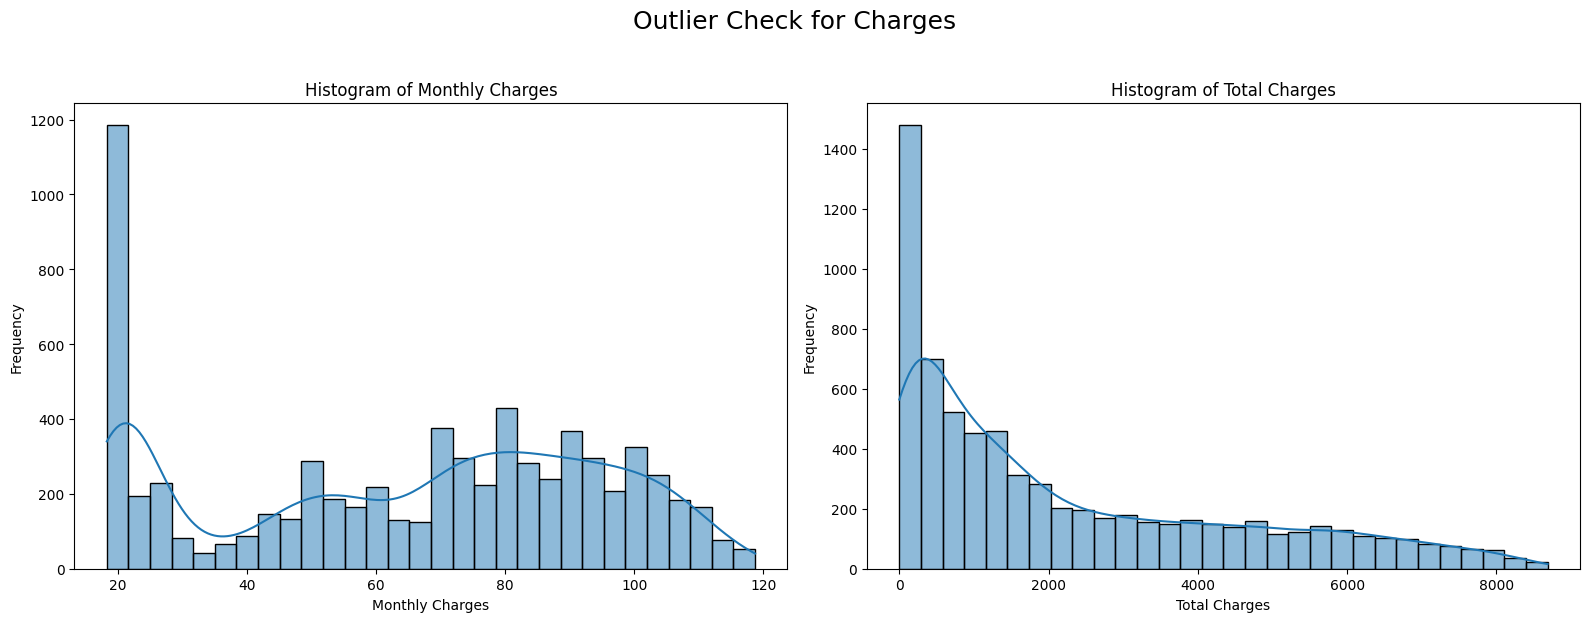

In [60]:
# --- 2. Histogram Visualization ---

# Set up the figure and axes for two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for MonthlyCharges
sns.histplot(df['MonthlyCharges'], kde=True, ax=ax1, bins=30)
ax1.set_title('Histogram of Monthly Charges')
ax1.set_xlabel('Monthly Charges')
ax1.set_ylabel('Frequency')

# Plot for TotalCharges
sns.histplot(df['TotalCharges'], kde=True, ax=ax2, bins=30)
ax2.set_title('Histogram of Total Charges')
ax2.set_xlabel('Total Charges')
ax2.set_ylabel('Frequency')

# Add a main title
plt.suptitle('Outlier Check for Charges', fontsize=18, y=1.03)

# Clean up the layout
plt.tight_layout()

# Save the figure
plt.savefig('charges_outlier_histograms.png')

# Show the plot in your notebook
plt.show()

### Definisi & Ruang Lingkup Churn

Penting untuk dicatat bahwa label `Churn` pada *dataset* awal mengandung dua tipe *customer* yang berbeda:

1.  ***Involuntary Churn* (Churn Paksa):** *Customer* yang diberhentikan oleh perusahaan, umumnya karena **gagal bayar**. Analisis investigatif kita menunjukkan bahwa ini adalah mayoritas *customer* yang *churn* pada `tenure` 1-2 bulan dengan metode pembayaran manual (`Electronic check` atau `Mailed check`).
2.  ***Voluntary Churn* (Churn Sukarela):** *Customer* yang secara sadar memutuskan berhenti, kemungkinan besar karena tidak puas dengan layanan, harga, atau beralih ke kompetitor.

Model *machine learning* ini bertujuan untuk memprediksi *customer* yang **bisa kita selamatkan (*saveable*)**. Memberikan promosi kepada *customer* yang sudah pasti gagal bayar tidak akan efektif.

Oleh karena itu, data telah difilter untuk menghapus *noise* dari *Involuntary Churn*.

**Definisi *Churn* (Proyek Ini):** *Churn* yang diprediksi oleh model ini adalah ***Voluntary Churn***. Model ini dilatih untuk mencari pola dari *customer* yang aktif saat ini yang memiliki karakteristik serupa dengan *customer* yang telah berhenti berlangganan **secara sukarela** di masa lalu.

In [61]:
df_churned = df[df['Churn'] == 'Yes'].copy()

print(f"Total pelanggan yang churn: {len(df_churned)}")

Total pelanggan yang churn: 1869


In [62]:
print("Distribusi Metode Pembayaran pada Pelanggan CHURN:")
print(df_churned['PaymentMethod'].value_counts(normalize=True) * 100)

Distribusi Metode Pembayaran pada Pelanggan CHURN:
PaymentMethod
Electronic check             57.303371
Mailed check                 16.479401
Bank transfer (automatic)    13.804173
Credit card (automatic)      12.413055
Name: proportion, dtype: float64


In [63]:
print("\nDistribusi Tenure (Bulan) pada Pelanggan CHURN (5 Teratas):")
print(df_churned['tenure'].value_counts().head(5))


Distribusi Tenure (Bulan) pada Pelanggan CHURN (5 Teratas):
tenure
1    380
2    123
3     94
4     83
5     64
Name: count, dtype: int64


In [64]:
# Atur tenure_cepat (coba 1, 2, atau 3)
TENURE_CEPAT = 2 

# Filter pelanggan yang churn dalam <= 2 bulan
df_churned_new = df_churned[df_churned['tenure'] <= TENURE_CEPAT]

print(f"\nDistribusi PaymentMethod untuk pelanggan yang churn dalam {TENURE_CEPAT} bulan:")
print(df_churned_new['PaymentMethod'].value_counts(normalize=True) * 100)


Distribusi PaymentMethod untuk pelanggan yang churn dalam 2 bulan:
PaymentMethod
Electronic check             58.648111
Mailed check                 30.218688
Bank transfer (automatic)     6.361829
Credit card (automatic)       4.771372
Name: proportion, dtype: float64


Berdasarkan data diatas menunjukan bahwa customer yang churn kurang dari 2 bulan berlangganan didominasi oleh metode pembayaran `Electronic check` dan `Mailed check`.


Total gabungan dari kedua metode manual tersebut mencapai **lebih dari 83%** pada kelompok *churn* dini ini. Hal ini, dikombinasikan dengan lonjakan anomali *customer churn* pada `tenure = 1` bulan (380 *customer*), memberikan indikasi kuat bahwa segmen ini bukanlah *Voluntary Churn* (churn sukarela karena tidak puas), melainkan **Involuntary Churn** (churn paksa).


Kemungkinan besar, ini adalah *customer* yang gagal melakukan pembayaran tagihan pertama atau kedua mereka, yang umum terjadi pada metode pembayaran non-otomatis. Data ini dianggap sebagai *noise* (gangguan) yang dapat mengotori model. Oleh karena itu, kita akan memfilter *customer* ini dari *dataset* agar model dapat fokus mempelajari pola *customer* yang *bisa diselamatkan* (*saveable*).

In [65]:
# 1. Definisikan metode pembayaran manual
manual_payment_methods = ['Electronic check', 'Mailed check']

# 2. Buat kondisi (mask) untuk pelanggan "Involuntary Churn"
mask_involuntary_churn = (
    (df['Churn'] == 'Yes') &
    (df['tenure'] <= 2) &
    (df['PaymentMethod'].isin(manual_payment_methods))
)

# 3. Hitung berapa banyak pelanggan yang akan kita hapus
num_to_remove = mask_involuntary_churn.sum()
print(f"Total pelanggan 'Involuntary Churn' (gagal bayar) yang teridentifikasi: {num_to_remove}")

# 4. Buat DataFrame baru yang BERSIH
# Tanda (~) artinya "NOT" / "KECUALI"
# Kita mengambil semua baris KECUALI yang ada di mask kita
df_cleaned = df[~mask_involuntary_churn].copy()

# 5. Tampilkan hasilnya
print(f"Jumlah data asli: {len(df)}")
print(f"Jumlah data setelah filter: {len(df_cleaned)}")
print(f"Total data yang dihapus: {len(df) - len(df_cleaned)}")

Total pelanggan 'Involuntary Churn' (gagal bayar) yang teridentifikasi: 447
Jumlah data asli: 7043
Jumlah data setelah filter: 6596
Total data yang dihapus: 447


In [66]:
df_cleaned.to_csv('Telco-Customer-Churn-Cleaned.csv', index=False)